In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
data={
    'Work_hours':[8,9,8,7,6,6,8,5,9,8],
    'Income':[200000,50000,25000,15000,12000,12000,25000,10000,50000,25000],
    'Age':[26,45,23,47,55,50,34,30,29,42],
    'Gender':[1,1,0,0,1,0,0,1,1,0] #1=Female,0=Male
}
df=pd.DataFrame(data)
print(df)

   Work_hours  Income  Age  Gender
0           8  200000   26       1
1           9   50000   45       1
2           8   25000   23       0
3           7   15000   47       0
4           6   12000   55       1
5           6   12000   50       0
6           8   25000   34       0
7           5   10000   30       1
8           9   50000   29       1
9           8   25000   42       0


In [9]:
x=df.drop('Income',axis=1)
y=df['Income']
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [10]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.4,random_state=42)
mode1=LogisticRegression()
mode1.fit(x_train,y_train)
y_pred=mode1.predict(x_test)

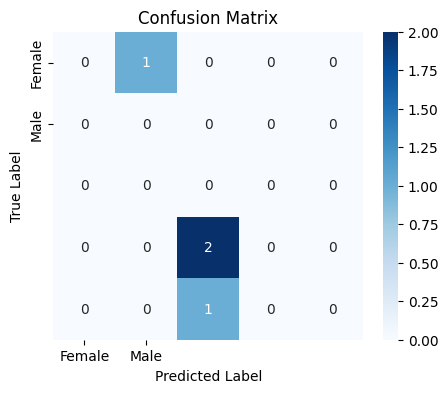

In [11]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Female','Male'],yticklabels=['Female','Male'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

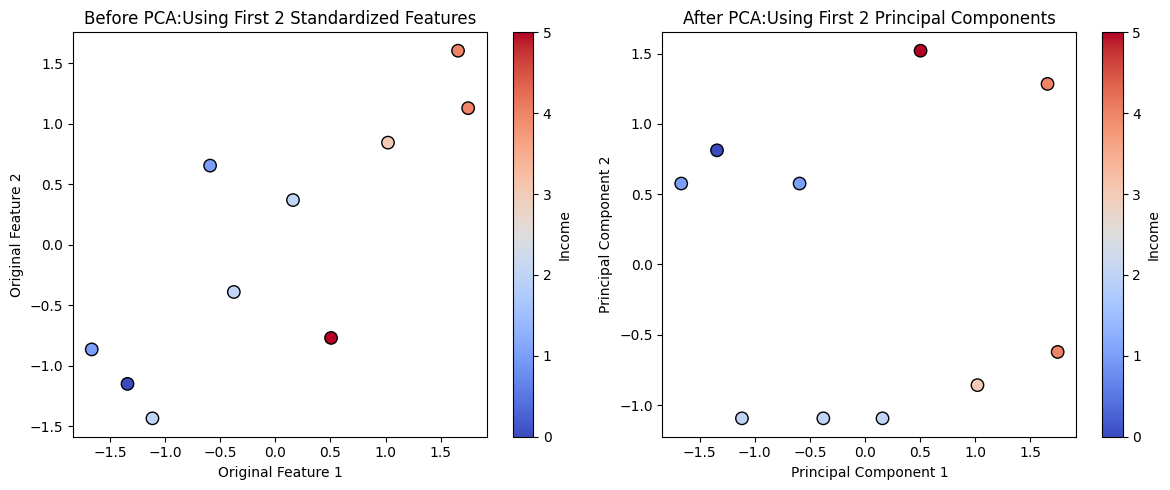

In [12]:
y_numeric=pd.factorize(y)[0]
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(x_pca[:,0],x_scaled[:,1],c=y_numeric,cmap='coolwarm',edgecolor='k',s=80)
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.title('Before PCA:Using First 2 Standardized Features')
plt.colorbar(label='Income')
plt.subplot(1,2,2)
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_numeric,cmap='coolwarm',edgecolor='k',s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA:Using First 2 Principal Components')
plt.colorbar(label='Income')
plt.tight_layout()
plt.show()